# Data Mining (2CSDE71)
## Name :- Harsh Pansuriya
## Roll No. :- 21BCE176
## Date :- 20th April, 2024
## Prac. No :- 10

### Aim:- 
Implement Random Forest Algorithm on Car Evaluation Database. It
contains examples with the structural information removed, i.e., it
directly relates CAR to the six input attributes: buying, maint, doors,
persons, lug_boot, safety. Basically, we have to build a classifier to
classify a car as 'Unacceptable', 'Acceptable', 'Good' and 'Very Good'
based on the attributes.
The different attributes values are given as follows:
1. buying: vhigh, high, med, low.
2. maint: vhigh, high, med, low.
3. doors: 2, 3, 4, 5, more.
4. persons: 2, 4, more.
5. lug_boot: small, med, big.
6. safety: low, med, high.

You can download the dataset from here :
https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
# Import Data
data = pd.read_csv("/Users/harsh/Documents/DM_prac/Database/car+evaluation/car.data", header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [20]:
# Split data into training data and testing data
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test, gbm_pred)

# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Train Neural Network Classifier
nn = MLPClassifier(max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Train Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_pred)

classifiers = ['GBM', 'Random Forest', 'Neural Network', 'Linear Discriminant Analysis']
accuracies = [gbm_accuracy, rf_accuracy, nn_accuracy, lda_accuracy]

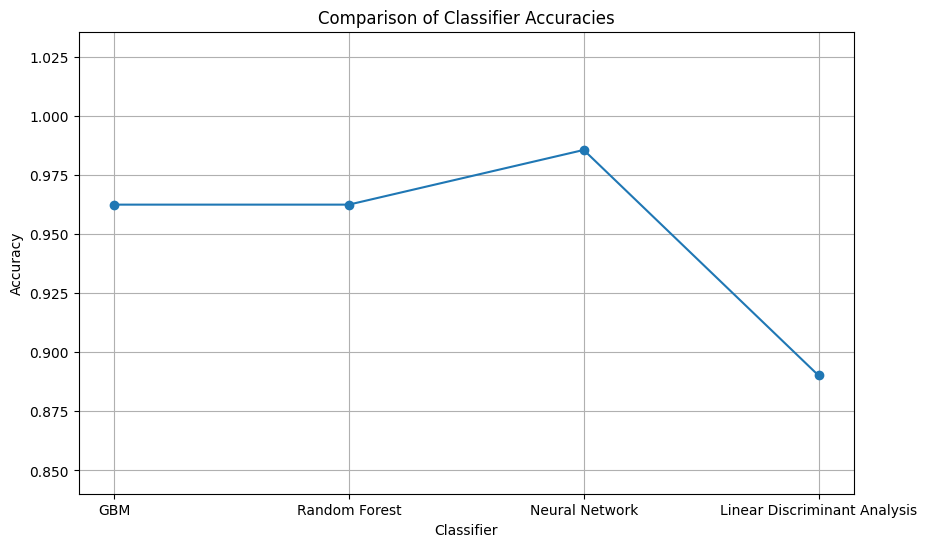

In [22]:
padding = 0.05

plt.figure(figsize=(10, 6))
plt.plot(classifiers, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies) - padding, max(accuracies) + padding)
plt.grid(True)
plt.show()

## Let's try Ensemble Modelling

In [32]:
base_classifiers = [
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    MLPClassifier(max_iter=1000),
    LinearDiscriminantAnalysis()
]

In [33]:
bagging = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=42)

bagging.fit(X_train, y_train)

bagging_pred = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [34]:
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

boosting.fit(X_train, y_train)

boosting_pred = boosting.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)

In [35]:
base_classifiers = [
    ('gbm', GradientBoostingClassifier()),
    ('rf', RandomForestClassifier()),
    ('nn', MLPClassifier(max_iter=1000)),
    ('lda', LinearDiscriminantAnalysis())
]

stacking = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)

stacking.fit(X_train, y_train)

stacking_pred = stacking.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

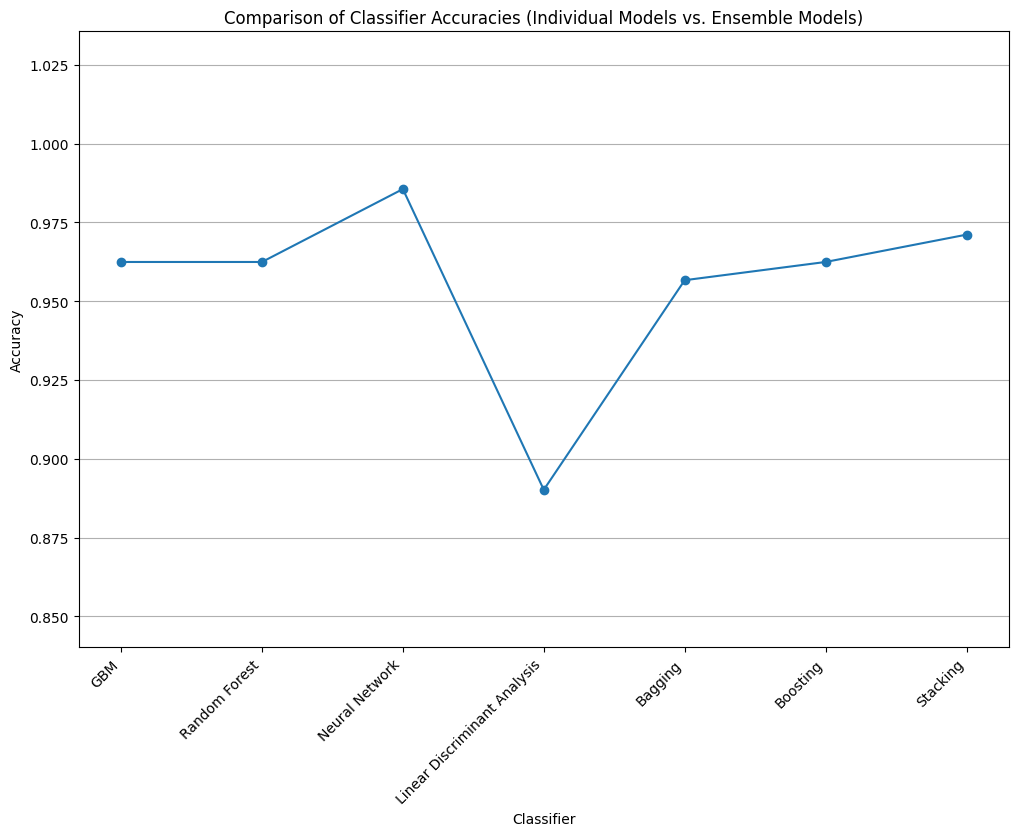

In [38]:
classifiers = ['GBM', 'Random Forest', 'Neural Network', 'Linear Discriminant Analysis', 
               'Bagging', 'Boosting', 'Stacking']

accuracies = [gbm_accuracy, rf_accuracy, nn_accuracy, lda_accuracy,
              bagging_accuracy, boosting_accuracy, stacking_accuracy]

plt.figure(figsize=(12, 8))
plt.plot(classifiers, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Classifier Accuracies (Individual Models vs. Ensemble Models)')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies) - padding, max(accuracies) + padding)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Let's try stacking multiple model of neural networks

In [39]:
base_classifiers = [
    ('nn1', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)),
    ('nn2', MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)),
    ('nn3', MLPClassifier(hidden_layer_sizes=(200,), max_iter=500))
]

stacking_nn = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
stacking_nn.fit(X_train, y_train)

stacking_nn_pred = stacking_nn.predict(X_test)
stacking_nn_accuracy = accuracy_score(y_test, stacking_nn_pred)

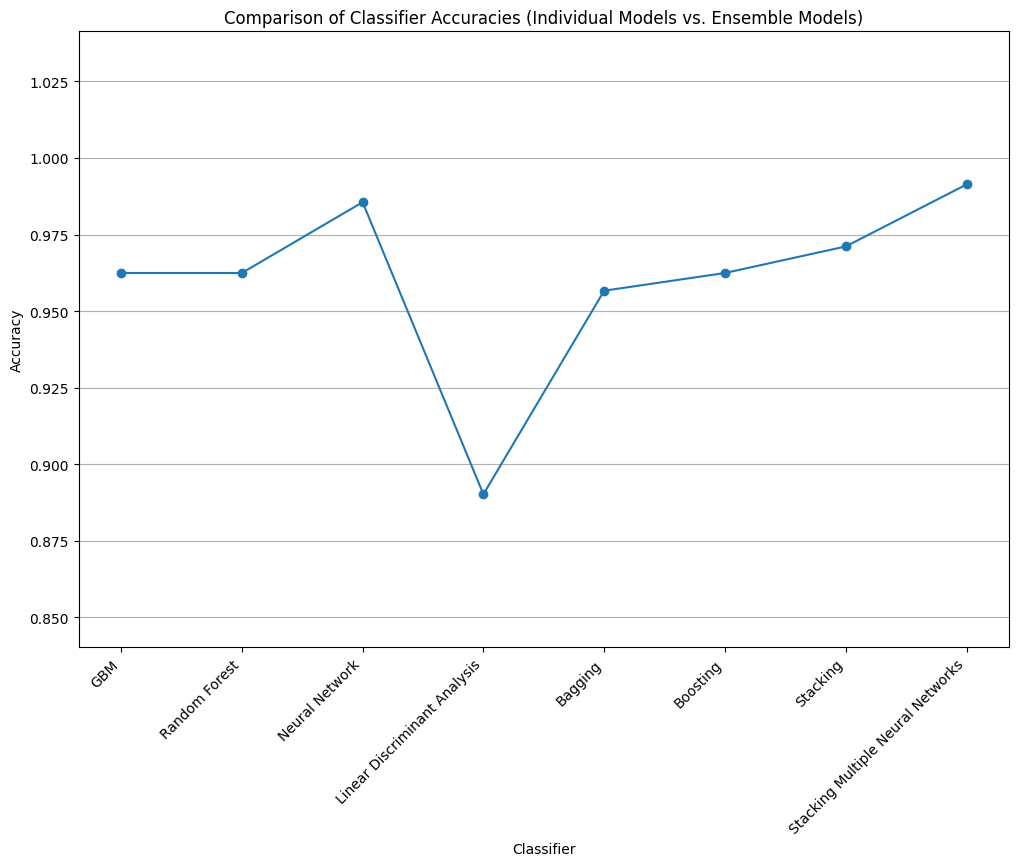

In [41]:
classifiers = ['GBM', 'Random Forest', 'Neural Network', 'Linear Discriminant Analysis', 
               'Bagging', 'Boosting', 'Stacking', 'Stacking Multiple Neural Networks']

accuracies = [gbm_accuracy, rf_accuracy, nn_accuracy, lda_accuracy,
              bagging_accuracy, boosting_accuracy, stacking_accuracy, stacking_nn_accuracy]

plt.figure(figsize=(12, 8))
plt.plot(classifiers, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Classifier Accuracies (Individual Models vs. Ensemble Models)')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies) - padding, max(accuracies) + padding)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()